In [111]:
import kagglehub
from seaborn import heatmap

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\Deniz\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [112]:
import pandas as pd
books=pd.read_csv(f"{path}/books.csv")

In [113]:
books


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written in 1954 specifically for Margaret Lockwood and opened first at the Theatre Royal Nottingham before moving to the Savoy Theatre in London on 14 December 1954. With THE MOUSETRAP and WI",2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Lewis' work on the nature 

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(47.10937499999999, 0.5, 'Missing Values')

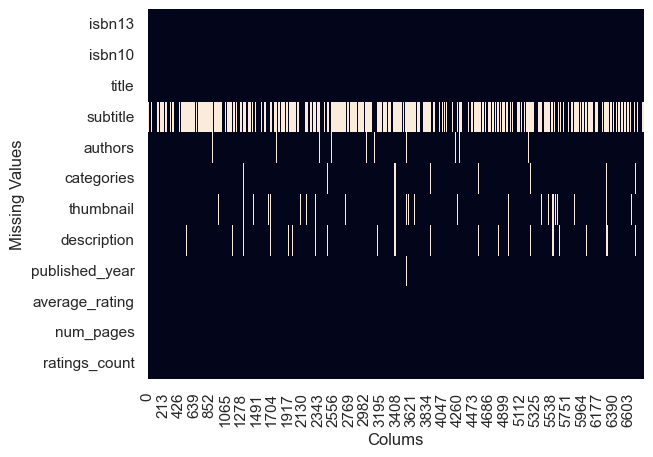

In [115]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)


plt.xlabel("Colums")
plt.ylabel("Missing Values")

In [116]:
import numpy as np
books["missing_description"]=np.where(books["description"].isna(),1, 0,)
books["age_of_book"]=2024 - books["published_year"]
books["books_missing"] = books[["description", "num_pages", "average_rating", "published_year"]].isna().any(axis=1).astype(int)


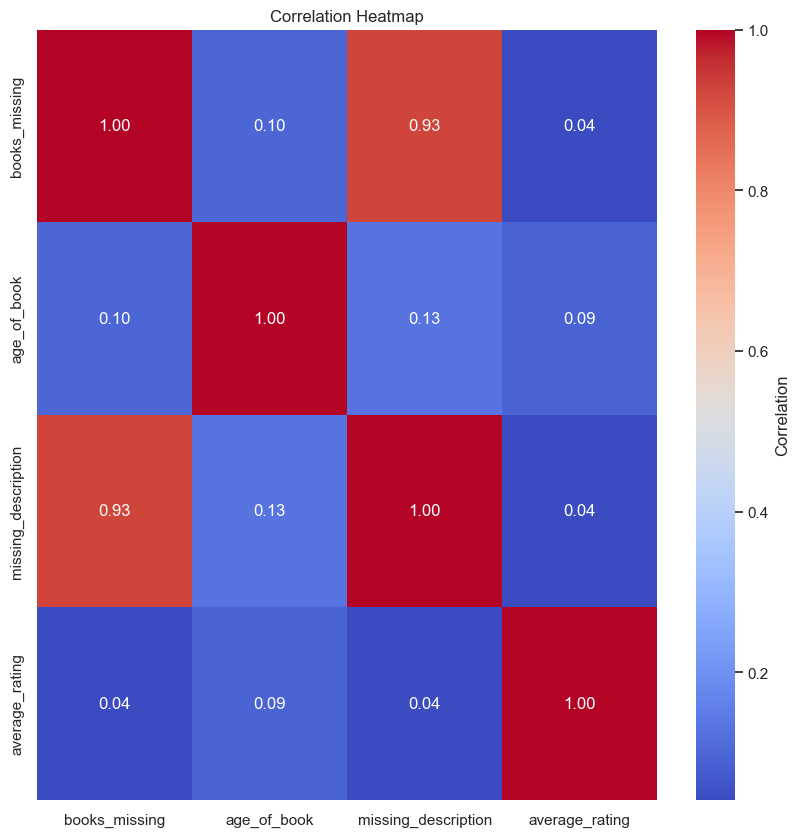

In [117]:
columns_of_interest = ["books_missing", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()



In [118]:
books_missing=books[~(books["description"].isna())&
      ~(books["num_pages"].isna())&
      ~(books["average_rating"].isna())&
      ~(books["published_year"].isna())
]

In [119]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written in 1954 specifically for Margaret Lockwood and opened first at the Theatre Royal Nottingham before moving to the Savoy Theatre in London on 14 December 1954. With THE MOUSETRAP and WI",2000.0,3.83,241.0,5164.0,0,24.0,0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,1982.0,3.97,479.0,172.0,0,42.0,0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,31.0,0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5Xs

array([[<Axes: title={'center': 'isbn13'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'average_rating'}>],
       [<Axes: title={'center': 'num_pages'}>,
        <Axes: title={'center': 'ratings_count'}>,
        <Axes: title={'center': 'missing_description'}>],
       [<Axes: title={'center': 'age_of_book'}>,
        <Axes: title={'center': 'books_missing'}>, <Axes: >]],
      dtype=object)

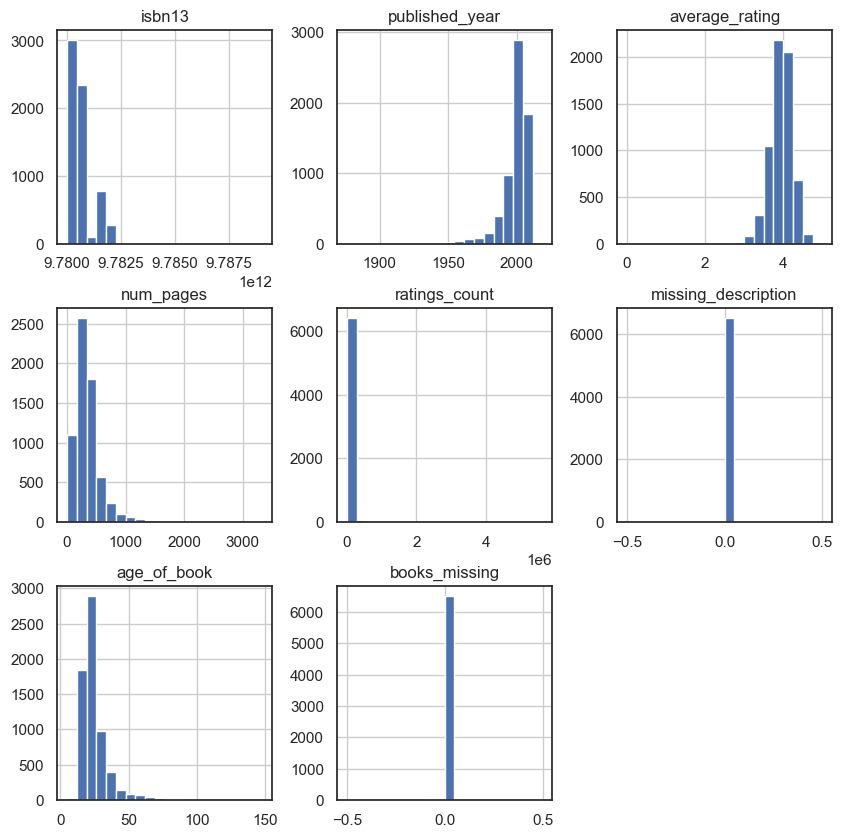

In [120]:
books_missing.hist(bins=20, figsize=(10,10))

In [121]:
books_missing["categories"].value_counts().reset_index().sort_values("count",ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [122]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written in 1954 specifically for Margaret Lockwood and opened first at the Theatre Royal Nottingham before moving to the Savoy Theatre in London on 14 December 1954. With THE MOUSETRAP and WI",2000.0,3.83,241.0,5164.0,0,24.0,0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,1982.0,3.97,479.0,172.0,0,42.0,0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,31.0,0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5Xs

In [134]:
books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()


In [130]:
books_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written in 1954 specifically for Margaret Lockwood and opened first at the Theatre Royal Nottingham before moving to the Savoy Theatre in London on 14 December 1954. With THE MOUSETRAP and WI",2000.0,3.83,241.0,5164.0,0,24.0,0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQawwEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.,1982.0,3.97,479.0,172.0,0,42.0,0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,31.0,0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books

In [131]:
books_missing.loc[books_missing["words_in_description"].between(1,4),"description"]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [132]:
books_missing.loc[books_missing["words_in_description"].between(5,14),"description"]

2       Volume Two of Stephen Donaldson's acclaimed second trilogy featuing the compelling anti-hero Thomas Covenant.
38                                     Koko is Peter Straub's foray into the psychological horror of the Vietnam War.
70                                                             A matter of life and death - and the Throne of England
77                                                                                     Nonsense rhyming story. 4 yrs+
84                                                  A study guide for the novel There's a Boy in the Girl's bathroom.
                                                            ...                                                      
6715                         The first comprehensive guide to addressing Native American issues in teaching children.
6726                                                                   Presents two complete novels from Henry James.
6757                                                    

In [77]:
print(books_missing.columns)
print(books_missing["words_in_description"].head())


Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_description', 'age_of_book',
       'books_missing', 'words_in_description'],
      dtype='object')
0    199.0
1    205.0
2     14.0
3     57.0
4     45.0
Name: words_in_description, dtype: float64


In [98]:
books_missing.loc[:, "words_in_description"] = books_missing["description"].str.split().str.len()


In [97]:
print(books_missing["description"].head())


0                                                  A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and

In [140]:
books_missing.loc[books_missing["words_in_description"].between(1, 4), "description"]


6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [139]:
books_missing.loc[books_missing["words_in_description"].between(5, 10), "description"]


77                                             Nonsense rhyming story. 4 yrs+
104                                            Library of Liberal Arts title.
241                    Originally published: [New York]: Clarion Books, 1994.
357     The most eloquent translation of Homer's Odyssey into modern English.
472         A study of the influence Romanticism exerts upon Western culture.
                                        ...                                  
6558      A moving anthology of correspondence between Gibran and May Ziadah.
6704                          Accessible and affordable illustrated biography
6726                           Presents two complete novels from Henry James.
6757                                              Audio Book- unabriged on CD
6795              Book Of Five Rings is a Kodansha International publication.
Name: description, Length: 102, dtype: object

In [102]:
books_missing.loc[books_missing["words_in_description"].between(5, 10), "description"].head(10)


77                                                   Nonsense rhyming story. 4 yrs+
104                                                  Library of Liberal Arts title.
241                          Originally published: [New York]: Clarion Books, 1994.
357           The most eloquent translation of Homer's Odyssey into modern English.
472               A study of the influence Romanticism exerts upon Western culture.
682                                                Biography of John Wesley Powell.
713    "Earlier version copyright under title Those familiar spirits"-- T.p. verso.
771                                                HINTON/THAT WAS THEN THIS IS NOW
805                        Offers translations of poems by the two Chinese writers.
842                   The Award-Winning New Translation Of The Great Russian Novel.
Name: description, dtype: object

In [103]:
short_desc = books_missing.loc[books_missing["words_in_description"].between(5, 10), "description"]
print(short_desc.head(10))


77                                                   Nonsense rhyming story. 4 yrs+
104                                                  Library of Liberal Arts title.
241                          Originally published: [New York]: Clarion Books, 1994.
357           The most eloquent translation of Homer's Odyssey into modern English.
472               A study of the influence Romanticism exerts upon Western culture.
682                                                Biography of John Wesley Powell.
713    "Earlier version copyright under title Those familiar spirits"-- T.p. verso.
771                                                HINTON/THAT WAS THEN THIS IS NOW
805                        Offers translations of poems by the two Chinese writers.
842                   The Award-Winning New Translation Of The Great Russian Novel.
Name: description, dtype: object


In [104]:
print(books_missing["words_in_description"].dtype)
print(books_missing["words_in_description"].isna().sum())


float64
0


In [105]:
filtered = books_missing.loc[books_missing["words_in_description"].between(5, 10)]
print(filtered.shape)


(102, 16)


In [106]:
books_missing.loc[books_missing["words_in_description"].between(5, 10), "description"]


77                                             Nonsense rhyming story. 4 yrs+
104                                            Library of Liberal Arts title.
241                    Originally published: [New York]: Clarion Books, 1994.
357     The most eloquent translation of Homer's Odyssey into modern English.
472         A study of the influence Romanticism exerts upon Western culture.
                                        ...                                  
6558      A moving anthology of correspondence between Gibran and May Ziadah.
6704                          Accessible and affordable illustrated biography
6726                           Presents two complete novels from Henry James.
6757                                              Audio Book- unabriged on CD
6795              Book Of Five Rings is a Kodansha International publication.
Name: description, Length: 102, dtype: object

In [137]:
books_missing.loc[books_missing["words_in_description"].between(5, 10), "description"]


77                                             Nonsense rhyming story. 4 yrs+
104                                            Library of Liberal Arts title.
241                    Originally published: [New York]: Clarion Books, 1994.
357     The most eloquent translation of Homer's Odyssey into modern English.
472         A study of the influence Romanticism exerts upon Western culture.
                                        ...                                  
6558      A moving anthology of correspondence between Gibran and May Ziadah.
6704                          Accessible and affordable illustrated biography
6726                           Presents two complete novels from Henry James.
6757                                              Audio Book- unabriged on CD
6795              Book Of Five Rings is a Kodansha International publication.
Name: description, Length: 102, dtype: object

In [110]:
books_missing.loc[books_missing["words_in_description"].between(15, 30), "description"]


9                                           Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
10                                                                                                      One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
14                                     Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.
21                Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the Church of England through the 20th century.
32                                                                                                                          

In [141]:
books_missing.loc[books_missing["words_in_description"].between(15, 35), "description"]

9                                 Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
10                                                                                            One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
14                           Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.
20         It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.
21      Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the

In [142]:
books_missing25words=books_missing[books_missing["words_in_description"] >=25]

In [143]:
books_missing25words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written in 1954 specifically for Margaret Lockwood and opened first at the Theatre Royal Nottingham before moving to the Savoy Theatre in London on 14 December 1954. With THE MOUSETRAP and WI",2000.0,3.83,241.0,5164.0,0,24.0,0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,31.0,0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the Gift-love of God, is divine, and without this supernatural love

In [149]:
books_missing25words["title_and_subtitle"] = np.where(
    books_missing25words["subtitle"].isna(),
    books_missing25words["title"],
    books_missing25words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1)
)



C:\Users\Deniz\AppData\Local\Temp\ipykernel_7612\2500253666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing25words["title_and_subtitle"] = np.where(


In [150]:
books_missing25words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written in 1954 specifically for Margaret Lockwood and opened first at the Theatre Royal Nottingham before moving to the Savoy Theatre in London on 14 December 1954. With THE MOUSETRAP and WI",2000.0,3.83,241.0,5164.0,0,24.0,0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2TgANz74C&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A memorable, mesmerizing heroine Jennifer -- brilliant, beautiful, an attorney on the way up until the Mafia's schemes win her the hatred of an implacable enemy -- and a love more destructive than hate. A dangerous, dramatic world The Dark Arena of organized crime and flashbulb lit courtrooms where ambitious prosecutors begin their climb to political power.",1993.0,3.93,512.0,29532.0,0,31.0,0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5XsFcpGIC&printsec=frontcover&img=1&zoom=1&source=gbs_api,"Lewis' work on the nature of love divides love into four categories; Affection, Friendship, Eros and Charity. The first three come naturally to humanity. Charity, however, the 

In [151]:
books_missing25words["tagged_description"]=books_missing25words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)

C:\Users\Deniz\AppData\Local\Temp\ipykernel_7612\1016983896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing25words["tagged_description"]=books_missing25words[["isbn13","description"]].astype(str).agg(" ".join, axis=1)


In [152]:
books_missing25words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0,199,Gilead,"9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike."
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written i

In [153]:
books_missing25words["tagged_description"] = books_missing25words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

C:\Users\Deniz\AppData\Local\Temp\ipykernel_7612\967059173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing25words["tagged_description"] = books_missing25words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [154]:
books_missing25words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,books_missing,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike.",2004.0,3.85,247.0,361.0,0,20.0,0,199,Gilead,"9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world has to offer. At its heart is a tale of the sacred bonds between fathers and sons, pitch-perfect in style and story, set to dazzle critics and readers alike."
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GPgAACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api,"A new 'Christie for Christmas' -- a full-length novel adapted from her acclaimed play by Charles Osborne Following BLACK COFFEE and THE UNEXPECTED GUEST comes the final Agatha Christie play novelisation, bringing her superb storytelling to a new legion of fans. Clarissa, the wife of a Foreign Office diplomat, is given to daydreaming. 'Supposing I were to come down one morning and find a dead body in the library, what should I do?' she muses. Clarissa has her chance to find out when she discovers a body in the drawing-room of her house in Kent. Desperate to dispose of the body before her husband comes home with an important foreign politician, Clarissa persuades her three house guests to become accessories and accomplices. It seems that the murdered man was not unknown to certain members of the house party (but which ones?), and the search begins for the murderer and the motive, while at the same time trying to persuade a police inspector that there has been no murder at all... SPIDER'S WEB was written i

In [155]:
books_missing25words.drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1).to_csv("books_cleaned.csv", index = False)